<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Regression Model Development</h2>
<h4>By Raquel Alvarenga</h4>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Analytical Objectives</h2><br>
This script encompasses feature engineering, model preparation, variable selection, and model development<br>
of a birth weight dataset.<br><br>
The main goals are to: <br>
a) Make a prediction for the birth weight of each infant, which is assumed to be a continuous variable.<br>
b) Identify key features that impact birth weight.<br>
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## 1) Importing Libraries and Inspecting Dataset

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from copy import deepcopy #to copy the value and keep the original dataframe.

#uploading excel file

file = './birthweight_low.xlsx'

# creating data frame
birthweight = pd.read_excel(io=file, 
                            header=0,
                            sheet_name=0)

# data frame shape
print(f"""
The birthweight date frame has {birthweight.shape[0]} rows and {birthweight.shape[1]} columns.""")



The birthweight date frame has 352 rows and 18 columns.


In [2]:
# Checking descriptive statistic of the dataset.
birthweight.describe().round(decimals=2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,352.00,349.00,352.00,349.00,352.00,345.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00
mean,38.93,13.54,2.02,13.53,40.60,13.58,7.95,8.88,10.76,5.53,0.55,0.33,0.36,0.30,0.40,0.33,0.27,3246.09
std,10.36,2.29,0.34,6.32,12.21,2.97,2.02,0.79,6.95,3.87,0.50,0.47,0.48,0.46,0.49,0.47,0.45,757.70
min,21.00,0.00,1.00,2.00,19.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,32.00,12.00,2.00,10.00,31.75,12.00,8.00,9.00,5.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2867.75
50%,37.00,13.00,2.00,12.00,39.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3349.00
75%,45.00,16.00,2.00,16.00,47.25,16.00,9.00,9.00,16.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3778.75
max,73.00,18.00,7.00,42.00,72.00,19.00,10.00,10.00,32.00,21.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00



<br><h2>2) Variables Classification and Description</h2>

<br><h2>3) Missing Values Analysis and Imputation</h2>

There are three features in the birthweight data frame with null values:
1. meduc
2. feduc
3. npvis

Given their skweked distributions, the missing values will be imputed with their respective median.


In [3]:
#checking if there are null values.
birthweight.isnull().sum(axis=0)

#creating new columns with missing values.
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)

        
# summing the missing value flags to check the results of the loop above
bnulls= birthweight[    ['m_meduc' , 'm_npvis',
             'm_feduc']    ].sum(axis = 0)

# printing final results.
print(f""" 
Var      Null values
-------- -----------
{bnulls}

""")
        

 
Var      Null values
-------- -----------
m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64




In [4]:
# creating a dropped dataset 
bwt_dropped = birthweight.dropna()

# instantiating imputation values

#meduc median
meduc_median = birthweight['meduc'].median()

# imputing 'meduc' - mother education in years.
birthweight['meduc'] = birthweight['meduc'].fillna(value=meduc_median)

#feduc median
feduc_median = birthweight['feduc'].median()

# imputing 'feduc' - father education in years.
birthweight['feduc'] = birthweight['feduc'].fillna(value=feduc_median)

#npvis median
npvis_median = birthweight['npvis'].median()

# imputing 'npvis' - total number of prenatal visits.
birthweight['npvis'] = birthweight['npvis'].fillna(value=npvis_median)

# Checking if the null values were removed. 
birthweight.isnull().sum(axis=0)

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64

## 4) Correlation Matrix

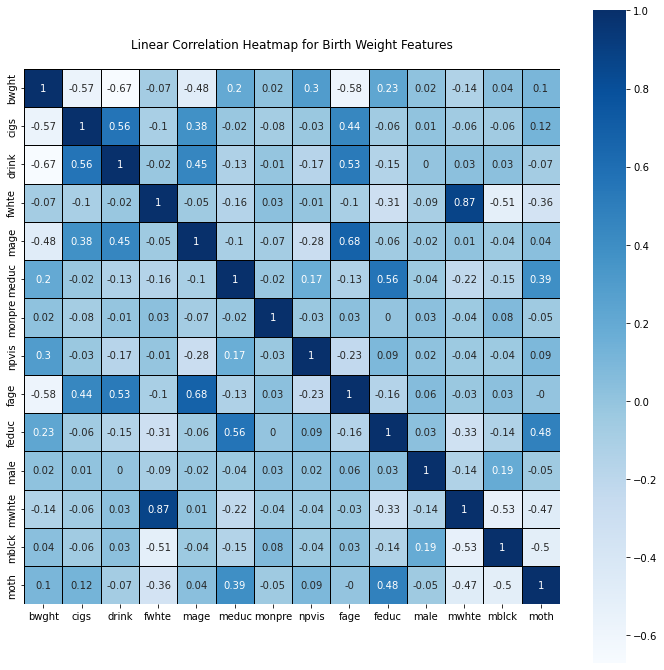


********************************************************************************
The variables that have the highest correlation with birth weight are drink
and cigr, which represent the average number of drinks and cigarettes the 
mother consumed while she was pregnant. Further analysis of these two variables
is presented in the next steps.
********************************************************************************



In [5]:
#variables of interest, factors that occured before the baby's birth.
my_vars= birthweight.loc[:,["bwght","cigs","drink","fwhte",
              "mage","meduc", "monpre","npvis","fage","feduc","male",
             "mwhte", "mblck", "moth"]]

# Correlation Matrix
bcorr= my_vars.corr(method='pearson').round(decimals=2)

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(12,12))


# developing a freezing cold heatmap
sns.heatmap(data       = bcorr, # the correlation matrix
            cmap       = 'Blues',     # changing to COOL colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)          # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for Birth Weight Features
""")

plt.show()

print(f"""
{'*' * 80}
The variables that have the highest correlation with birth weight are drink
and cigr, which represent the average number of drinks and cigarettes the 
mother consumed while she was pregnant. Further analysis of these two variables
is presented in the next steps.
{'*' * 80}
""")

## 5) Variables Distribution <b>
 
Analyzing the distribution of key variables using histograms to assess skewness.

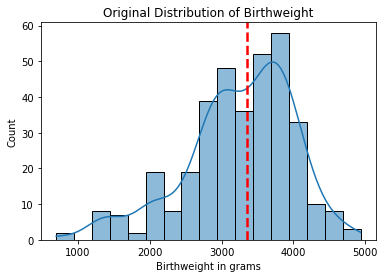


Birth weight has a median value of 3349 and a mean of 3246.

*** Red line represents the median



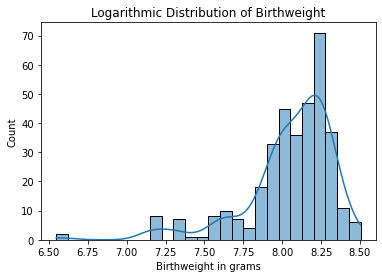

In [6]:
# Checking the distribution of birth weight.

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight in grams") # avoiding using dataset labels
plt.ylabel(ylabel = "Count" )

# Tracing median value in red.
plt.axvline(x=birthweight.bwght.median(),
            color='red',
            ls='--', 
            lw=2.5)

# displaying the histogram
plt.show()

bmedian= round(birthweight["bwght"].median())
bmean=  round(birthweight["bwght"].mean())

print(f"""
Birth weight has a median value of {bmedian} and a mean of {bmean}.

*** Red line represents the median
""")


# log transforming birth weight and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight in grams") # avoiding using dataset labels
plt.ylabel(ylabel = "Count" )
#plt.xlim(0,50000) 

plt.show()


#No need to log this variable.


## Scatterplot depicting the relationship of cigs and drinks with birth weight

Text(0.5, 0.98, "Relationship of Cigarettes and Drinks Consumption During Pregnancy with Infant's Weight")

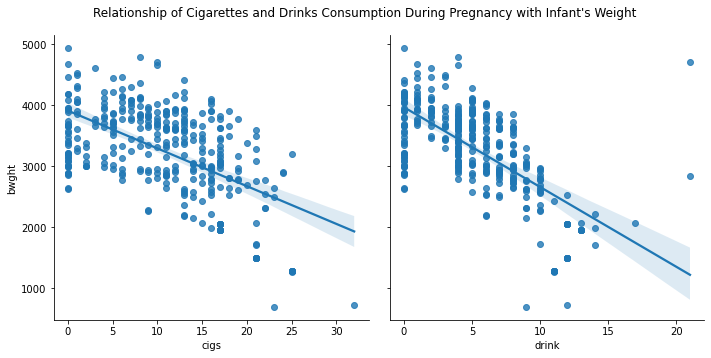

In [7]:
#Scatterplot grid to compare consumption of drinks and cigarettes with infant's weight.

# assigning variables 
cigs_drink = sns.PairGrid(birthweight, y_vars=["bwght"], x_vars=["cigs", "drink"], 
                          height=5)
cigs_drink.fig.subplots_adjust(top=0.9)

#adding regplot
cigs_drink.map(sns.regplot)
cigs_drink.fig.suptitle(
"""Relationship of Cigarettes and Drinks Consumption During Pregnancy with Infant's Weight""")



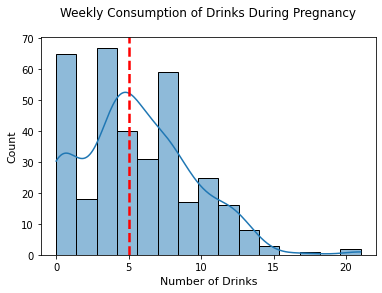

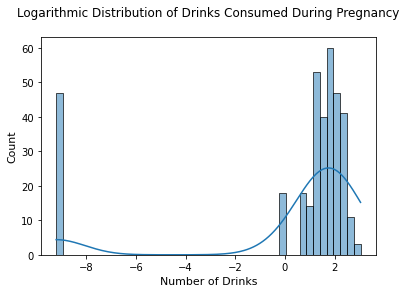

In [8]:
# Histogram of avg drinks consumed weekly by the mother during pregnancy.

sns.histplot(data = birthweight,
          x      = 'drink',
          kde    = True)


# title and axis labels
plt.title(label   = """Weekly Consumption of Drinks During Pregnancy\n""", size=12)
plt.xlabel(xlabel = "Number of Drinks", size=11) # avoiding using dataset labels
plt.ylabel(ylabel = "Count",size=11 )

# Tracing median value in red.
plt.axvline(x=birthweight.drink.median(),
            color='red',
            ls='--', 
            lw=2.5)


# displaying the histogram
plt.show()


# log transforming drinks and saving it to the dataset
birthweight['log_drink'] = np.log(birthweight['drink']+0.0001)

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_drink',
          kde    = True)


# title and axis labels
plt.title(label   = """Logarithmic Distribution of Drinks Consumed During Pregnancy\n""", size=12)
plt.xlabel(xlabel = "Number of Drinks", size=11) # avoiding using dataset labels
plt.ylabel(ylabel = "Count", size=11 )
#plt.xlim(0,50000) 

plt.show()

# no need of logarithmic transformation.


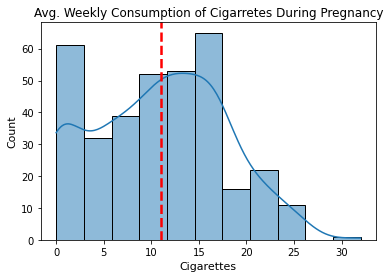

/Users/raquelalvarenga7/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


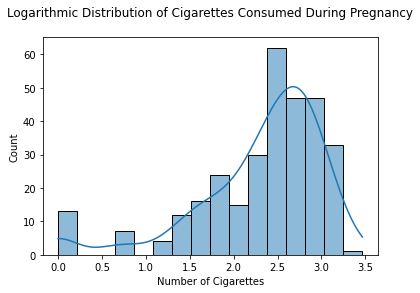

In [9]:
# Histogram of avg cigarretes consumed weekly by the mother during pregnancy.

sns.histplot(data = birthweight,
          x      = 'cigs',
          kde    = True)


# title and axis labels
plt.title(label   = "Avg. Weekly Consumption of Cigarretes During Pregnancy",
         size=12)

plt.xlabel(xlabel = "Cigarettes",size=11) # avoiding using dataset labels
plt.ylabel(ylabel = "Count",size=11 )

# Tracing median value in red.
plt.axvline(x=birthweight.cigs.median(),
            color='red',
            ls='--', 
            lw=2.5)


# displaying the histogram
plt.show()


# log transforming drinks and saving it to the dataset
birthweight['log_cigs'] = np.log(birthweight['cigs'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_cigs',
          kde    = True)


# title and axis labels
plt.title(label   = """Logarithmic Distribution of Cigarettes Consumed During Pregnancy\n""", size=12)
plt.xlabel(xlabel = "Number of Cigarettes") # avoiding using dataset labels
plt.ylabel(ylabel = "Count" )
#plt.xlim(0,50000) 

plt.show()




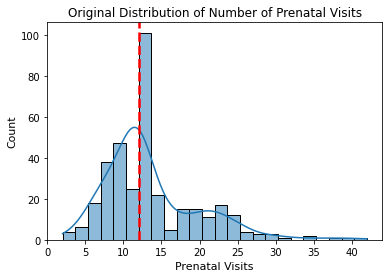

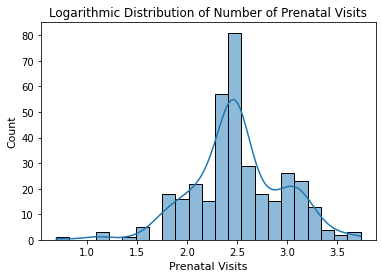

In [10]:
## NPVIS

# developing a histogram using HISTPLOT for number of prenatal visits (npvis)
sns.histplot(data   = birthweight,
          x      = 'npvis',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Number of Prenatal Visits",size=12)
plt.xlabel(xlabel = "Prenatal Visits", size=11) # avoiding using dataset labels
plt.ylabel(ylabel = "Count" , size=11)

# Tracing median value in red.
plt.axvline(x=birthweight.npvis.median(),
            color='red',
            ls='--', 
            lw=2.5)


# displaying the histogram
plt.show()

# log transforming pvis and saving it to the dataset
birthweight['log_npvis'] = np.log(birthweight['npvis'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_npvis',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Number of Prenatal Visits", size=12)
plt.xlabel(xlabel = "Prenatal Visits", size=11) # avoiding using dataset labels
plt.ylabel(ylabel = "Count", size=11 )

plt.show()

#LOG HELPFUL

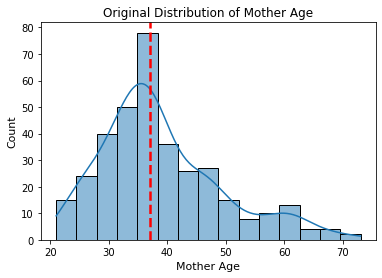

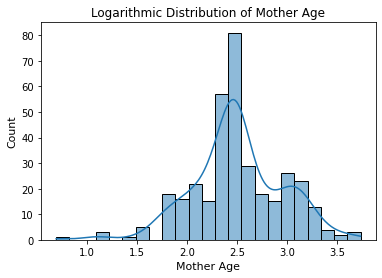

In [11]:
## Mother Age Distribution

# developing a histogram using HISTPLOT for number of prenatal visits (npvis)
sns.histplot(data   = birthweight,
          x      = 'mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Mother Age",size=12)
plt.xlabel(xlabel = "Mother Age", size=11) # avoiding using dataset labels
plt.ylabel(ylabel = "Count" , size=11)

# Tracing median value in red.
plt.axvline(x=birthweight.mage.median(),
            color='red',
            ls='--', 
            lw=2.5)


# displaying the histogram
plt.show()

# log transforming pvis and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_npvis',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother Age", size=12)
plt.xlabel(xlabel = "Mother Age", size=11) # avoiding using dataset labels
plt.ylabel(ylabel = "Count", size=11 )

plt.show()

#LOG HELPFUL

## 6) Creation of Bins for Cigs and Drink
The creation of bins for these two variables improve birthweight predictions in the regression models. 

In [12]:
# Creating categories for cig variable based on the descriptive statistics
#- 0 = Non-smoker
#- 0-5 = Light-smoker  (25quartile)
#- 5-16 = Mid-Smoker  (75quartile)
#- More than 16 = Heavy_Smoker

#Creating a while loop to make the categories
idx = 0
cigs_bin = deepcopy(birthweight['cigs']) #copying the original value of cigs, 
                                         #changing and replacing the values in the new column not to modify the original data
while idx < len(birthweight['cigs']):
    var = birthweight['cigs'][idx]
    if var == 0:
        cigs_bin[idx] = 'non_smoker' #if the person doesn´t smoke it will be consider a non-smoker
    elif var < 5:
        cigs_bin[idx] = 'light_smoker' #if the person smoke less than 5 it will be consider a light smoker
    elif var < 16:
        cigs_bin[idx] = 'mid_smoker'  #if the person smoke more than 5 but less than 16 it will be consider a mid-smoker
    else:
        cigs_bin[idx] = 'heavy_smoker' #if the person smoke more than 16 it will be consider a heavy-smoker
    idx += 1
birthweight['cigs_bin'] = cigs_bin

In [13]:
# Creating categories for drink variable based on the descriptive statistics
#- 0 = Non-drinker
#- 0-3 = Light-drinker (25quartile)
#- 3-8 = Mid-Drinker (75quartile)
#- More than 8 = Heavy_Drinker

#Creating a while loop to make the categories
idx = 0
drink_bin = deepcopy(birthweight['drink']) #copying the original value of cigs, 
                                         #changing and replacing the values in the new column not to modify the original data
while idx < len(birthweight['drink']):
    var = birthweight['drink'][idx]
    if var == 0:
        drink_bin[idx] = 'non_drinker' #if the person doesn´t drink it will be consider a non-drinker
    elif var < 3 :
        drink_bin[idx] = 'light_drinker' #if the person drink less than 3 it will be consider a light-drinker
    elif var < 8 :
        drink_bin[idx] = 'mid_drinker' #if the person drinks more than 3 but less than 8 it will be consider a mid-drinker
    else:
        drink_bin[idx] = 'heavy_drinker' #if the person drink more than 8 it will be consider a heavy-drinker
    idx += 1
birthweight['drink_bin'] = drink_bin

## 7) Dummy Variables

In [14]:
#Converting the categorical variables (cigs and drinks) into dummy variables

# Encoding the categorical variables -  one hot encoding categorical variables
one_hot_cigs      = pd.get_dummies(birthweight['cigs_bin'])
one_hot_drink     = pd.get_dummies(birthweight['drink_bin'])


# Joining codings together
birthweight = birthweight.join([one_hot_cigs,one_hot_drink ]) #the dummies will be include in the data without deleating the previous information

# Saving new columns
new_columns = birthweight.columns


## 8) Assesing Correlation of Actual and Logarithmic Variables with Birth Weight

In [16]:
habits_corr = birthweight.loc[ : , ['drink',
                                    'log_drink',
                                    'cigs',
                                    'log_cigs',
                                    'bwght',
                                    'log_bwght',
                                    'npvis',
                                   'log_npvis',
                                   'mage',
                                   'log_mage'] ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



habits_corr.loc[ ['drink','log_drink','cigs','log_cigs','npvis','log_npvis',
                 'mage','log_mage'],
              ['bwght','log_bwght']]


#logarithm of npvis improves the correlation.

,bwght,log_bwght
drink,-0.67,-0.65
log_drink,-0.27,-0.26
cigs,-0.57,-0.58
log_cigs,-0.50,-0.48
npvis,0.30,0.31
log_npvis,0.36,0.39
mage,-0.48,-0.49
log_mage,-0.46,-0.47


In [17]:
# dropping unneeded logs
birthweight= birthweight.drop(['log_drink','log_cigs'], axis = 1)


In [18]:
#preparing variables for ols model
for var in birthweight: 
    if var != 'bwght':
        print(f"""{var} + """)
    else:
        pass


mage + 
meduc + 
monpre + 
npvis + 
fage + 
feduc + 
omaps + 
fmaps + 
cigs + 
drink + 
male + 
mwhte + 
mblck + 
moth + 
fwhte + 
fblck + 
foth + 
m_meduc + 
m_npvis + 
m_feduc + 
log_bwght + 
log_npvis + 
log_mage + 
cigs_bin + 
drink_bin + 
heavy_smoker + 
light_smoker + 
mid_smoker + 
non_smoker + 
heavy_drinker + 
light_drinker + 
mid_drinker + 
non_drinker + 


## 9) Statsmodels Regression 

Preliminary Model to observe p-values and other metrics.

In [19]:
# STATSMODELS linear regression output

#only including variables before infant's birth.
lm_fit = smf.ols(formula = """ log_bwght ~ 
                                        fwhte + 
                                         mage + 
                                        meduc + 
                                        monpre + 
                                        log_npvis + 
                                        fage + 
                                        feduc + 
                                        male + 
                                        mwhte + 
                                        mblck + 
                                        moth +
                                        heavy_smoker + 
                                        light_smoker + 
                                        mid_smoker + 
                                        non_smoker + 
                                        heavy_drinker + 
                                        light_drinker + 
                                        mid_drinker + 
                                        non_drinker 
    """, data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     49.08
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.13e-77
Time:                        16:08:09   Log-Likelihood:                 151.95
No. Observations:                 352   AIC:                            -269.9
Df Residuals:                     335   BIC:                            -204.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3895      0.061     71.803      0.000       4.269       4.510
fwhte             0.0096      0.037      0.256      0.798      -0.064       0.083
mage             -0.0026      0.001     -2.189      0.029      -0.005      -0.000
meduc             0.0051      0.005      1.086      0.278      -0.004       0.014
monpre           -0.0094      0.027     -0.353      0.724      -0.062       0.043
log_npvis         0.0964      0.021      4.549      0.000       0.055       0.138
fage             -0.0066      0.001     -6.117      0.000      -0.009      -0.004
feduc             0.0090      0.004      2.280      0.023       0.001       0.017
male             -0.0264      0.018     -1.464      0.144      -0.062       0.009
mwhte             1.4426      0.033     43.799      0.000       1.378       1.507
mblck             1.4722      0.025     59.639      0.000       1.424       1.521
moth              1.4746      0.029     50.920      0.000       1.418       1.532
heavy_smoker      0.9881      0.025     40.240      0.000       0.940       1.036
light_smoker      1.2132      0.028     43.174      0.000       1.158       1.268
mid_smoker        1.1393      0.021     53.522      0.000       1.097       1.181
non_smoker        1.0488      0.033     32.003      0.000       0.984       1.113
heavy_drinker     0.9088      0.026     34.806      0.000       0.857       0.960
light_drinker     1.2402      0.028     43.973      0.000       1.185       1.296
mid_drinker       1.1193      0.022     49.813      0.000       1.075       1.164
non_drinker       1.1212      0.029     38.219      0.000       1.063       1.179
==============================================================================
Omnibus:                       34.083   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.649
Skew:                          -0.456   Prob(JB):                     1.53e-19
Kurtosis:                       5.253   Cond. No.                     6.37e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.24e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 10) Model Development in Sklearn

In [20]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# applying model in scikit-learn

# declaring set of x-variables
# removed variables with p-values lower than 0.05
#ols model variables

x_variables =[ "heavy_smoker","light_smoker","mid_smoker", "non_smoker", "heavy_drinker",
             "light_drinker", "mid_drinker","log_npvis","fage", 
              "mwhte", "mblck", "moth","mage"]

# lasso variables
x_variables2 =[ "heavy_smoker","light_smoker", "non_smoker", "heavy_drinker",
               "light_drinker","log_npvis", "mblck", "moth","mage"]

# Preparing a DataFrame based the the analysis above
birthweight_data   = birthweight.loc[ : , x_variables]

# Preparing the target variable for ols
birthweight_target = birthweight.loc[ : , 'log_bwght']

#Preparing a DataFrame based the the analysis above
birthweight_data2 = birthweight.loc[ : , x_variables2]

# Preparing the target variable for lasso
birthweight_target2= birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# OLS train-test split (Log Y)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data ,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# Lasso train-test split (Normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data2,     # x-variables
            birthweight_target2,   # y-variable
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (264, 13)
y-side: 264


Testing Data
------------
X-side: (88, 13)
y-side: 88



## OLS Regression Model

In [21]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6884
OLS Testing Score  : 0.682
OLS Train-Test Gap : 0.0064


## Lasso Regression Model

In [22]:
from sklearn.linear_model import Lasso


# INSTANTIATING a model object
lasso_model = Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.631
Lasso Testing Score  : 0.7004
Lasso Train-Test Gap : 0.0694


/Users/raquelalvarenga7/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [23]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns,lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3594.1)
('heavy_smoker', -454.11)
('light_smoker', 187.26)
('mid_smoker', -161.74)
('non_smoker', -627.14)
('heavy_drinker', 392.99)
('light_drinker', 239.63)
('mid_drinker', 28.43)
('log_npvis', 58.95)
('fage', -18.43)


## K-Nearest Neighbors Regression Model (KNN)

In [24]:
# KNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

#feduc
#mage

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Preparing explanatory variable data
# For the KNN Model we will used all the log transformations in the x-

x_var   = [
    'log_mage',
    'log_npvis',
    'light_smoker',
    'mid_smoker',
    'heavy_smoker',
    'light_drinker',
    'heavy_drinker',
    'mwhte']

# Preparing x-variables from the knn model
knn_data = birthweight.loc[:, x_var]


# Preparing response variables
y_target = birthweight.loc[ : , 'log_bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            knn_data,     # x-variables
            y_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# Preparing training and testings sets
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(
            knn_data,         # x-variables
            y_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# Instantiating a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 6) 

# Fitting to the training data
knn_fit = knn_reg.fit(x_train_knn, y_train_knn)


# Scoring the results
print('KNN Training Score:', knn_reg.score(x_train_knn, y_train_knn).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_knn, y_test_knn).round(4))


# Saving scoring data 
knn_reg_score_train = knn_reg.score(x_train_knn, y_train_knn).round(4)
knn_reg_score_test  = knn_reg.score(x_test_knn, y_test_knn).round(4)


# Displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.8121
KNN Testing Score : 0.7634
KNN Train-Test Gap: 0.0487


## Regression Models Results

In [26]:
print ("""
Regression Models Result
------------------------
""")

print(f"""
Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
OLS        {lr_train_score}           {lr_test_score}          {lr_test_gap}
Lasso      {lasso_train_score}            {lasso_test_score}          {lasso_test_gap}
KNN        {knn_reg_score_train}           {knn_reg_score_test}         {knn_reg_test_gap}


Model Chosen: KNN
*Moderate train-test gap for a regression model.
*Highest train and test scores.
""")


Regression Models Result
------------------------


Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
OLS        0.6884           0.682          0.0064
Lasso      0.631            0.7004          0.0694
KNN        0.8121           0.7634         0.0487


Model Chosen: KNN
*Moderate train-test gap for a regression model.
*Highest train and test scores.

